![alt text](Task_3.png)

▶*TASK-3 : IRIS FLOWER CLASSIFICATION*

> Author: Hamesh Raj

> Batch: April

> Domain: Data Science

*Step 1: Import necessary libraries*

In [534]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

*Step 2: load the dataset*

In [535]:
df = pd.read_csv("IRIS.csv")

In [536]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [537]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [538]:
# Modify target names to remove "Iris-" prefix
df['species'] = df['species'].str.replace('Iris-', '')

In [539]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [540]:
print("Rows of the dataset", df.shape[0])
print("Columns of the dataset", df.shape[1])

Rows of the dataset 150
Columns of the dataset 5


In [541]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [543]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


*Step 3: Data Preprocessing and Data Cleaning*

In [544]:
# display no. of samples on each class
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [545]:
#checking null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

*Step 4: Data visualization*

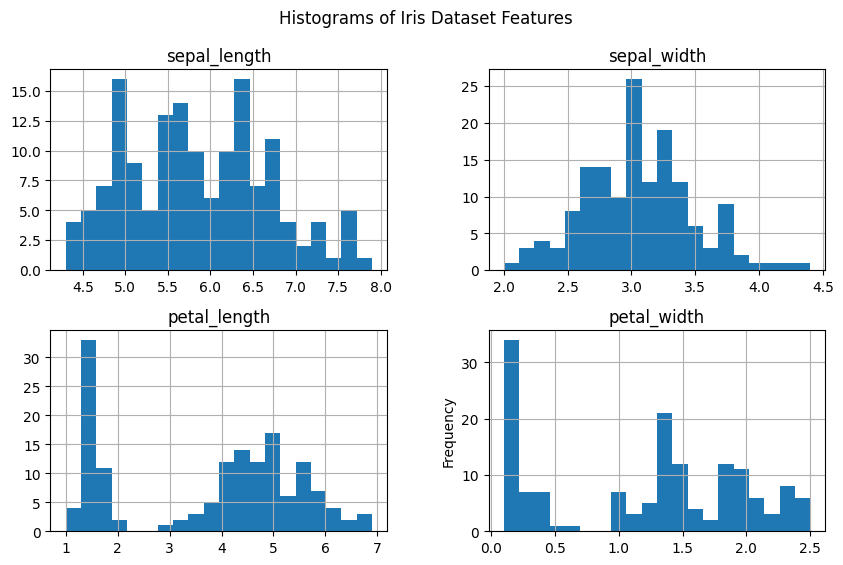

In [546]:
# Plot histograms for all features
df.hist(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], figsize=(10, 6), bins=20)

# Set common y-axis label
plt.ylabel('Frequency')

# Set common title
plt.suptitle('Histograms of Iris Dataset Features')

# Show the plot
plt.show()

In [547]:
#scatterplot
colors=['yellow','green','brown']
species=['setosa','versicolor','virginica']

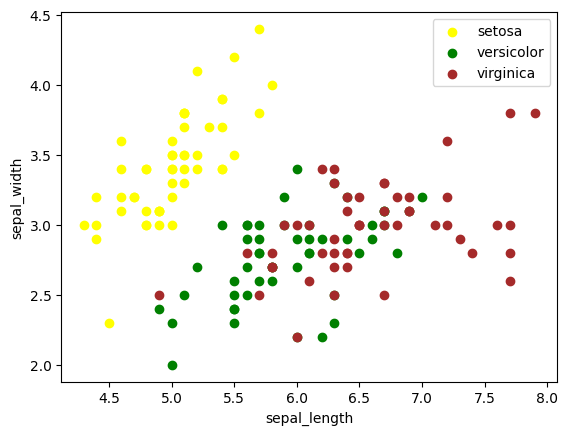

In [548]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

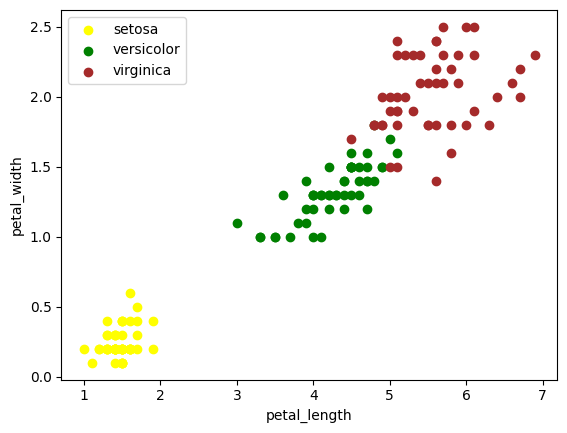

In [549]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

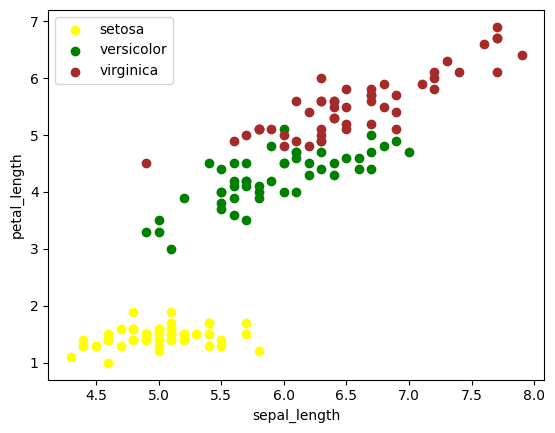

In [550]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()

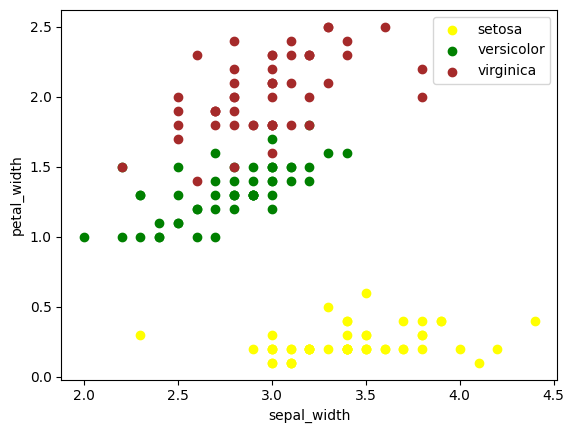

In [551]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()
plt.show()

In [552]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#df['species']=le.fit_transform(df['species'])
#df

In [553]:
# Display correlation matrix
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Display correlation matrix
print(numerical_df.corr())

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<Axes: >

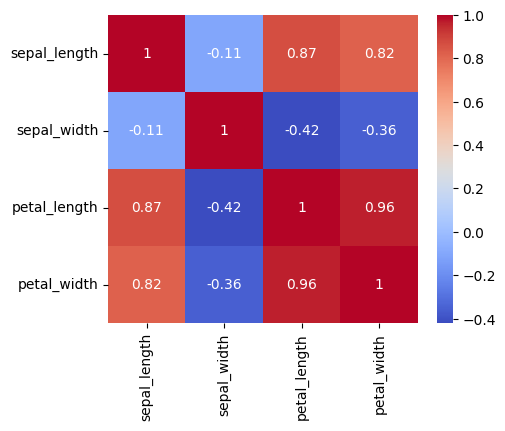

In [554]:
corr=numerical_df.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

*Step 5: Model Training*

In [555]:
#model training
from sklearn.model_selection import train_test_split
#train - 70
#test - 30
X=df.drop(columns=['species'])
Y=df['species']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

*1. Applying logistic regression*

In [556]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [557]:
model.fit(X_train,Y_train)

LogisticRegression()

In [558]:
#metrics to get performance
print('Accuracy',model.score(X_test,Y_test)*100)

Accuracy 95.55555555555556


In [559]:
# Predict the species for the given data

predicted_species_index1 = model.predict([[5.0, 3.6, 1.4, 0.2]])
print("Predicted species:", predicted_species_index1)

# Predict the species for the given data

predicted_species_index2 = model.predict([[6.2, 3.4, 5.4, 2.3]])
print("Predicted species:", predicted_species_index2)
# Predict the species for the given data

predicted_species_index3 = model.predict([[7.0, 3.2, 4.7, 1.4]])
print("Predicted species:", predicted_species_index3)

Predicted species: ['setosa']
Predicted species: ['virginica']
Predicted species: ['versicolor']


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


*2. Using K-Nearest Neighbours*

In [560]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()


In [561]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [562]:
#metrics to get performance 
print('Accuracy',model.score(X_test,Y_test)*100)

Accuracy 95.55555555555556


In [573]:
# Predict the species for the given data

predicted_species_index1 = model.predict([[2.0, 4.6, 6.4, 0.2]])
print("Predicted species:", predicted_species_index1)

# Predict the species for the given data

predicted_species_index2 = model.predict([[5.2, 3.4, 5.4, 1.3]])
print("Predicted species:", predicted_species_index2)
# Predict the species for the given data

predicted_species_index3 = model.predict([[3.0, 6.2, 4.7, 5.4]])
print("Predicted species:", predicted_species_index3)

Predicted species: ['setosa']
Predicted species: ['versicolor']
Predicted species: ['virginica']


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


*3. Using decision tree*

In [564]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [565]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [566]:
#to check accuracy
print('Accuracy',model.score(X_test,Y_test)*100)

Accuracy 93.33333333333333


In [577]:
# Predict the species for the given data

predicted_species_index1 = model.predict([[2.0, 2.6, 5.4, 0.2]])
print("Predicted species:", predicted_species_index1)

# Predict the species for the given data

predicted_species_index2 = model.predict([[3.2, 6.4, 5.4, 2.3]])
print("Predicted species:", predicted_species_index2)
# Predict the species for the given data

predicted_species_index3 = model.predict([[0.2, 3.2, 1.7, 1.4]])
print("Predicted species:", predicted_species_index3)

Predicted species: ['setosa']
Predicted species: ['virginica']
Predicted species: ['versicolor']


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
